In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Model Building

## Logistic Regression

We will start with Logistic Regression as our first model to predict the binary target variable.

In [2]:
train = pd.read_csv('./data/prepped_data.csv')
test = pd.read_csv('./data/prepped_test.csv')

In [3]:
## dropping the Loan_ID column as it does not give us predictive power
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [4]:
y = train['Loan_Status']
X = train.drop('Loan_Status', axis=1)

We will create dummy variables for the categorical variables.

In [5]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [6]:
## Creating a validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Now we will measure the accuracy on the validation data set to see how the model is performing on the data it has not seen

In [8]:
pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7621621621621621

That is a good accuracy score!

Now, let's make predictions for the test dataset.

In [9]:
pred_test = model.predict(test)

In [10]:
test_submission = pd.DataFrame({'Loan_Status': pred_test})

In [11]:
test_submission.to_csv('./data/logistic_submission.csv', index=False)

## Logistic Regression with k-fold cross-validation

We will now use k-fold cross validation to check how robust is our model when it comes to unseen data. As out dataset is not large, we can use cross-validation to get an estimate for our model performance.

In [12]:
## CV logic for k=5 folds
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'{i} of kfold{kf.n_splits}\n')
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(xtr, ytr)
    pred_cv=model.predict(xvl)
    score=accuracy_score(yvl, pred_cv)
    mean += score
    print('Accuracy Score --> ', score)
    i+=1
    pred_test_cv = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy --> ', mean/(i-1))


1 of kfold5

Accuracy Score -->  0.8211382113821138
2 of kfold5

Accuracy Score -->  0.7967479674796748
3 of kfold5

Accuracy Score -->  0.8048780487804879
4 of kfold5

Accuracy Score -->  0.7560975609756098
5 of kfold5

Accuracy Score -->  0.8278688524590164
Mean Validation Accuracy -->  0.8013461282153805


The mean validation accuracy for this model is 80%, which is very good. We will now plot the ROC-AUC curve.

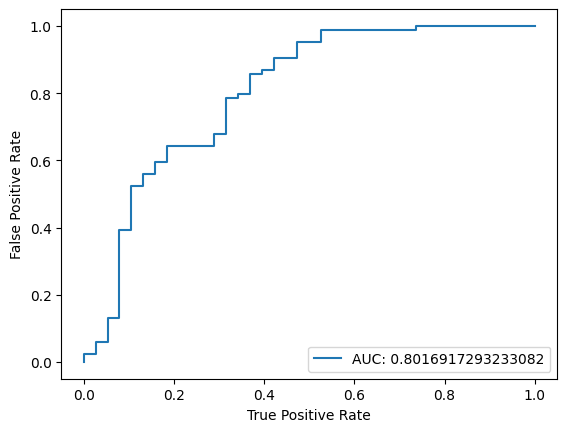

In [13]:
fpr, tpr, _ = roc_curve(yvl, pred)
auc = roc_auc_score(yvl, pred)
plt.plot(fpr, tpr, label=f'AUC: {auc}')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [14]:
test_submission_cv = pd.DataFrame({'Loan_Status': pred_test_cv})

In [15]:
test_submission_cv.to_csv('./data/logistic_CV_submission.csv', index=False)

In [18]:
train.to_csv('./data/im_train.csv', index=False)
test.to_csv('./data/im_test.csv', index=False)